In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data = pd.read_csv("seattle-weather.csv")

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
#Check for null values
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
#convert the data type into datetime
data['date'] = pd.to_datetime(data['date'])

In [8]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [9]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [10]:
#preprocessing the lables
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [11]:
#droping the class
data = data.drop('date',axis=1)

In [12]:
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [13]:
x = data.drop('weather',axis=1)
y = data['weather']

In [14]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [15]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

#Split the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


In [18]:
X_train

,precipitation,temp_max,temp_min,wind
1135,6.1,13.3,8.3,2.5
1214,0.0,16.1,7.2,4.7
1407,6.6,11.1,7.8,1.8
811,0.0,11.1,1.1,1.8
985,0.0,24.4,12.8,5.9
...,...,...,...,...
763,0.0,8.9,1.1,2.5
835,0.5,14.4,7.8,4.0
1216,0.0,18.3,8.9,3.7
559,0.0,26.1,11.1,3.1


In [19]:
y_train

1135    2
1214    4
1407    2
811     4
985     4
       ..
763     4
835     2
1216    4
559     4
684     2
Name: weather, Length: 1095, dtype: int64

In [20]:
X_test

,precipitation,temp_max,temp_min,wind
530,0.0,20.0,12.2,3.7
657,0.0,10.6,7.8,1.4
459,8.4,14.4,10.0,3.0
279,0.0,23.9,7.8,5.1
656,0.0,12.8,7.2,1.2
...,...,...,...,...
781,3.0,10.0,5.6,6.9
1391,0.0,12.8,7.2,2.6
1168,17.0,13.9,9.4,3.8
847,6.9,11.1,6.1,5.8


In [21]:
y_test

530     4
657     4
459     2
279     4
656     4
       ..
781     2
1391    1
1168    2
847     2
1425    4
Name: weather, Length: 366, dtype: int64

#Logistic Regression

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 0.40650505, -0.41329488,  0.03412509, -0.52483647],
       [-0.45068983, -0.03457403, -0.18232393,  0.96436384],
       [ 0.47676693, -0.71086126, -0.06426083, -0.99867294],
       ...,
       [-0.45068983,  0.26299236,  0.15218819,  0.28745461],
       [-0.45068983,  1.31800044,  0.58508622, -0.11869093],
       [-0.02911857, -0.77848998, -0.18232393,  1.84434584]])

In [24]:
X_test

array([[-0.45068983,  0.49293002,  0.80153523,  0.28745461],
       [-0.45068983, -0.77848998, -0.06426083, -1.26943663],
       [ 0.72970968, -0.26451169,  0.3686372 , -0.18638186],
       ...,
       [ 1.93821393, -0.33214041,  0.2505741 ,  0.35514553],
       [ 0.51892405, -0.71086126, -0.39877294,  1.708964  ],
       [-0.45068983, -0.94079892, -1.79585295,  0.69360015]])

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 130   0  25]
 [  0   0   6   0   0]
 [  0   0  14   0 149]]


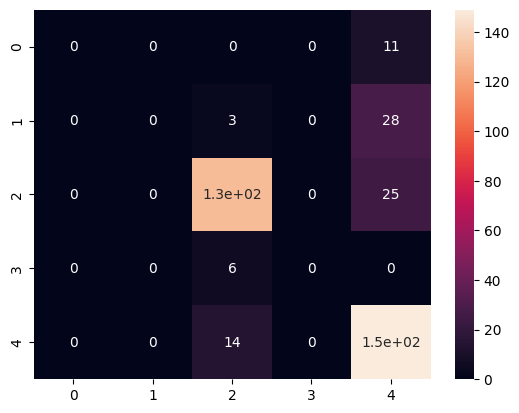

In [28]:
sns.heatmap(cm,annot=True)
plt.show()

In [32]:
acc1 = accuracy_score(y_test, y_pred)
print("Accuracy score:",acc1*100)

Accuracy score: 76.22950819672131


#SVM

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
y_pred

array([4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 3, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 126   0  29]
 [  0   0   4   2   0]
 [  0   0   0   0 163]]


In [37]:
print("Accuracy score: ",acc2*100)

Accuracy score:  79.50819672131148


K Nearest Neighbour

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
y_pred

array([4, 2, 2, 4, 0, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 1, 2, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 2, 2, 4, 1, 2, 4, 2, 2, 2, 4, 4, 1, 2,
       4, 1, 4, 2, 2, 2, 2, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 0, 4, 2,
       4, 2, 4, 0, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 0, 4, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 1,
       1, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       1, 1, 4, 4, 4, 4, 4, 4, 2, 1, 4, 2, 1, 4, 4, 4, 1, 4, 2, 2, 4, 1,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 2, 4, 1, 4, 1,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 0, 4,
       1, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   1   3   0   6]
 [  1   4   5   0  21]
 [  0   3 127   0  25]
 [  0   0   3   1   2]
 [  5  17  26   0 115]]


In [42]:
acc3 = accuracy_score(y_test, y_pred)
print("Accuracy score:",acc3*100)

Accuracy score: 67.75956284153006


Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
y_pred

array([4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 3, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 4, 2, 4, 2, 3, 4, 4, 4, 4, 2, 4, 4, 2, 3, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 141   2  12]
 [  0   0   2   4   0]
 [  0   0   0   0 163]]


In [47]:
acc4 = accuracy_score(y_test, y_pred)
print("Accuracy score : ",acc4*100)

Accuracy score :  84.15300546448088
